In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

In [57]:
dftrain = pd.read_csv("voice_train.csv")
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

In [58]:
dftrain['label'].value_counts()

female    1432
male      1419
Name: label, dtype: int64

In [59]:
dftrain[dftrain.duplicated()]

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label


In [60]:
dftrain.describe()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,1591.565416,0.180923,0.057143,0.185722,0.140349,0.224730,0.084381,3.118469,35.808329,0.895312,0.408473,0.165481,0.180923,0.142891,0.036834,0.258968,0.833608,0.052634,5.075745,5.023111,0.173933
std,909.939169,0.029796,0.016588,0.036175,0.048628,0.023509,0.042728,4.163727,131.430900,0.044795,0.176880,0.076918,0.029796,0.032191,0.019182,0.029806,0.525565,0.062982,3.526201,3.525193,0.119463
min,1.000000,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.108696,0.007812,0.004883,0.007812,0.000000,0.000000
25%,808.500000,0.163739,0.042082,0.169726,0.111139,0.208756,0.042663,1.638410,5.604497,0.862190,0.259191,0.118100,0.163739,0.117578,0.018223,0.253968,0.423799,0.007812,2.207031,2.183594,0.099591
50%,1590.000000,0.184848,0.059151,0.190067,0.140229,0.225729,0.094235,2.183320,8.255809,0.901840,0.396548,0.186667,0.184848,0.140678,0.046921,0.271186,0.767578,0.023438,4.992188,4.968750,0.139159
75%,2382.500000,0.199061,0.066891,0.210650,0.175690,0.243700,0.114208,2.932962,13.649354,0.928727,0.533495,0.221341,0.199061,0.169593,0.047904,0.277457,1.180411,0.070312,7.078125,7.042969,0.209525
max,3167.000000,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [61]:
dftrain.skew()

Id         -0.001228
meanfreq   -0.608137
sd          0.145654
median     -1.015778
Q25        -0.495925
Q75        -0.821695
IQR         0.299418
skew        4.946760
kurt        5.881449
sp.ent     -0.429966
sfm         0.350951
mode       -0.839555
centroid   -0.608137
meanfun     0.032909
minfun      1.916373
maxfun     -2.215242
meandom     0.610751
mindom      1.683842
maxdom      0.738665
dfrange     0.740749
modindx     2.075593
dtype: float64

<AxesSubplot:xlabel='meanfreq'>

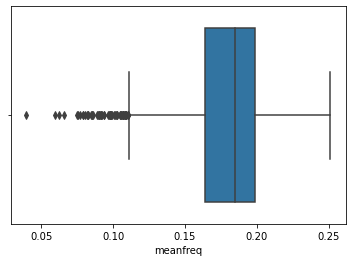

In [62]:
sns.boxplot(x=dftrain['meanfreq'])

<AxesSubplot:ylabel='meanfreq'>

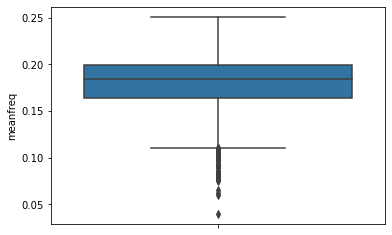

In [63]:
sns.boxplot(y=dftrain['meanfreq'])

In [64]:
dftrain['label'] = dftrain.label.map({'female':0, 'male':1})

In [65]:
dftrain.corr()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
Id,1.000000,0.423441,-0.525021,0.343340,0.555125,0.049947,-0.604299,-0.108434,-0.151616,-0.504004,-0.432672,0.286635,0.423441,0.773210,0.294314,0.248827,0.324576,0.164870,0.296024,0.293163,-0.037142,-0.864980
meanfreq,0.423441,1.000000,-0.741923,0.924077,0.910995,0.742288,-0.628384,-0.319367,-0.313939,-0.604421,-0.787154,0.688672,1.000000,0.448524,0.378820,0.280244,0.535998,0.220328,0.521057,0.517270,-0.228999,-0.324928
sd,-0.525021,-0.741923,1.000000,-0.562995,-0.848960,-0.167634,0.873957,0.310967,0.343378,0.715366,0.837660,-0.532027,-0.741923,-0.454038,-0.339304,-0.136742,-0.486732,-0.349011,-0.488449,-0.482353,0.133479,0.467738
median,0.343340,0.924077,-0.562995,1.000000,0.772545,0.732938,-0.475962,-0.257094,-0.244301,-0.502036,-0.661471,0.679711,0.924077,0.404615,0.330022,0.257550,0.453497,0.180631,0.437742,0.434640,-0.223605,-0.271785
Q25,0.555125,0.910995,-0.848960,0.772545,1.000000,0.477469,-0.875383,-0.312586,-0.344764,-0.650356,-0.767701,0.590687,0.910995,0.531689,0.312754,0.202017,0.466120,0.296501,0.460777,0.455611,-0.152750,-0.499747
Q75,0.049947,0.742288,-0.167634,0.732938,0.477469,1.000000,0.006798,-0.208412,-0.149539,-0.182133,-0.386301,0.489348,0.742288,0.149706,0.262243,0.290610,0.359507,-0.028663,0.337006,0.337614,-0.225156,0.073227
IQR,-0.604299,-0.628384,0.873957,-0.475962,-0.875383,0.006798,1.000000,0.241082,0.310095,0.639951,0.661167,-0.403014,-0.628384,-0.522739,-0.211655,-0.070020,-0.332685,-0.353214,-0.338984,-0.332770,0.049962,0.609044
skew,-0.108434,-0.319367,0.310967,-0.257094,-0.312586,-0.208412,0.241082,1.000000,0.976422,-0.195626,0.078386,-0.432556,-0.319367,-0.163111,-0.217216,-0.095604,-0.336715,-0.057414,-0.305442,-0.304504,-0.162630,0.029698
kurt,-0.151616,-0.313939,0.343378,-0.244301,-0.344764,-0.149539,0.310095,0.976422,1.000000,-0.124912,0.109282,-0.405428,-0.313939,-0.192141,-0.203453,-0.060314,-0.302926,-0.100471,-0.274293,-0.272576,-0.200493,0.083386
sp.ent,-0.504004,-0.604421,0.715366,-0.502036,-0.650356,-0.182133,0.639951,-0.195626,-0.124912,1.000000,0.865949,-0.328950,-0.604421,-0.507143,-0.302332,-0.124272,-0.298051,-0.282068,-0.331158,-0.326213,0.206535,0.484417


In [66]:
dftrain.sort_values(by='Id')

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2640,1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
1436,2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
1975,3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
2432,4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
1979,5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
135,3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
1392,3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
1195,3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [67]:
X = dftrain.drop(['Id','label'], axis=1)
y = dftrain.label

In [68]:
ss = StandardScaler()
data=ss.fit_transform(X)
#data=scalardata.transform(X)
X=pd.DataFrame(data, columns=X.columns)

In [69]:
X

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-0.623883,0.064103,-0.322299,-0.825262,-1.200534,0.278687,-0.238108,-0.213025,0.585461,0.104014,0.385583,-0.623883,-1.461487,-1.047004,-0.794390,-0.813695,-0.091453,-0.451378,-0.449873,-0.155605
1,-0.646844,0.017576,-0.430875,0.353223,-1.778436,-1.380490,0.924906,0.191463,-0.556019,0.290687,0.071948,-0.646844,0.639881,-1.107138,-1.841760,-0.453776,1.878085,-0.310942,-0.344585,0.294196
2,-0.524738,0.286272,-1.400411,-0.450036,0.018980,0.522622,-0.116888,-0.176391,0.526612,0.029103,-0.471882,-0.524738,-0.709662,-0.091068,-1.233032,-0.713700,0.559890,-1.151617,-1.161949,2.393624
3,0.240925,-0.084888,0.561433,-0.202709,0.201657,0.341651,-0.379550,-0.233339,0.424534,-0.055412,0.744003,0.240925,-1.069463,-0.809712,-3.809057,-0.647757,1.149201,-0.096827,-0.117386,-0.575439
4,0.220689,-0.778880,0.120239,0.338375,-0.395440,-0.602670,-0.352003,-0.228060,0.271625,-0.398937,0.396848,0.220689,0.361579,0.599828,0.674551,0.532652,-0.463650,1.046601,1.055184,-0.593074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,-0.476160,-0.269267,-0.450531,0.458691,-1.510646,-1.353184,1.064604,0.306878,-0.670496,0.106555,0.025802,-0.476160,0.303240,-0.735550,-1.699089,-1.254972,1.723003,-1.378751,-1.409929,-0.314543
2847,0.597316,0.109455,0.874010,0.056821,1.160207,0.573677,-0.480856,-0.245332,0.487009,-0.255044,0.807171,0.597316,-0.110901,0.711139,0.674551,-0.079007,-0.463650,-0.030348,-0.022073,-0.152101
2848,0.718673,0.353189,1.001537,-0.057687,1.705490,1.004009,-0.268580,-0.221650,-0.479253,-0.829602,1.396205,0.718673,-0.599070,0.545199,0.358893,0.678550,-0.463650,0.667675,0.676149,-0.673929
2849,0.029407,0.057813,0.174616,-0.343039,0.035642,0.410017,-0.486863,-0.241987,0.675722,0.110115,0.328334,0.029407,-1.003719,0.672959,0.514016,-0.084772,-0.463650,-0.203192,-0.194966,-0.934518


<AxesSubplot:ylabel='meanfreq'>

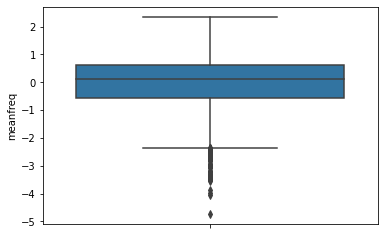

In [70]:
sns.boxplot(y=X['meanfreq'])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB

### DecisionTreeClassifier

In [73]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
prediction = dtc.predict(X_test)

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[359  11]
 [ 13 330]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       370
           1       0.97      0.96      0.96       343

    accuracy                           0.97       713
   macro avg       0.97      0.97      0.97       713
weighted avg       0.97      0.97      0.97       713



### RandomForestClassifier

In [74]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
prediction = rfc.predict(X_test)

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[364   6]
 [  9 334]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       370
           1       0.98      0.97      0.98       343

    accuracy                           0.98       713
   macro avg       0.98      0.98      0.98       713
weighted avg       0.98      0.98      0.98       713



### naive_bayes - BernoulliNB

In [75]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
prediction = bnb.predict(X_test)

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[305  65]
 [ 30 313]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.87       370
           1       0.83      0.91      0.87       343

    accuracy                           0.87       713
   macro avg       0.87      0.87      0.87       713
weighted avg       0.87      0.87      0.87       713



### naive_bayes - GaussianNB

In [76]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
prediction = gnb.predict(X_test)

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[330  40]
 [ 27 316]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       370
           1       0.89      0.92      0.90       343

    accuracy                           0.91       713
   macro avg       0.91      0.91      0.91       713
weighted avg       0.91      0.91      0.91       713



### Apply RandamForest on Test Data

In [77]:
dftest = pd.read_csv("voice_test.csv")
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        317 non-null    int64  
 1   meanfreq  317 non-null    float64
 2   sd        317 non-null    float64
 3   median    317 non-null    float64
 4   Q25       317 non-null    float64
 5   Q75       317 non-null    float64
 6   IQR       317 non-null    float64
 7   skew      317 non-null    float64
 8   kurt      317 non-null    float64
 9   sp.ent    317 non-null    float64
 10  sfm       317 non-null    float64
 11  mode      317 non-null    float64
 12  centroid  317 non-null    float64
 13  meanfun   317 non-null    float64
 14  minfun    317 non-null    float64
 15  maxfun    317 non-null    float64
 16  meandom   317 non-null    float64
 17  mindom    317 non-null    float64
 18  maxdom    317 non-null    float64
 19  dfrange   317 non-null    float64
 20  modindx   317 non-null    float6

In [78]:
dftest = dftest.drop(['Id'], axis=1)
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  317 non-null    float64
 1   sd        317 non-null    float64
 2   median    317 non-null    float64
 3   Q25       317 non-null    float64
 4   Q75       317 non-null    float64
 5   IQR       317 non-null    float64
 6   skew      317 non-null    float64
 7   kurt      317 non-null    float64
 8   sp.ent    317 non-null    float64
 9   sfm       317 non-null    float64
 10  mode      317 non-null    float64
 11  centroid  317 non-null    float64
 12  meanfun   317 non-null    float64
 13  minfun    317 non-null    float64
 14  maxfun    317 non-null    float64
 15  meandom   317 non-null    float64
 16  mindom    317 non-null    float64
 17  maxdom    317 non-null    float64
 18  dfrange   317 non-null    float64
 19  modindx   317 non-null    float64
dtypes: float64(20)
memory usage: 49.

In [79]:
#ss = StandardScaler()
data=ss.fit_transform(dftest)
#data=scalardata.transform(X)
dftest=pd.DataFrame(data, columns=dftest.columns)

In [80]:
prediction = rfc.predict(dftest)
df=pd.DataFrame(prediction, columns=['label'])
#df['label'] = df['label'].map({0:'male', 1:'female'})
df

,label
0,0
1,1
2,1
3,0
4,0
...,...
312,0
313,0
314,0
315,1


In [81]:
df.to_csv('voice_test_prediction.csv')